In [2]:
!git clone https://github.com/ultralytics/yolov5 #clone yolov5 algorithm
!git clone https://github.com/eddiemicwu/DataMiningProject #clone dataset
%cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 5750 (delta 66), reused 52 (delta 24), pack-reused 5636
Receiving objects: 100% (5750/5750), 8.51 MiB | 23.55 MiB/s, done.
Resolving deltas: 100% (3920/3920), done.
Cloning into 'DataMiningProject'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 614 (delta 0), reused 0 (delta 0), pack-reused 613
Receiving objects: 100% (614/614), 81.97 MiB | 33.52 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/yolov5
     |████████████████████████████████| 645kB 9.0MB/s 


In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir logs

In [3]:
import os
import torch
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from IPython.display import Image, clear_output
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as pl
#import wandb
clear_output()

TEST

In [ ]:
#!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/DataMiningProject/images/test_PNGImages

In [ ]:
#Image(filename='runs/detect/exp/PennPed00066.png')

Train Own Model

In [ ]:
#!wandb.init(project="pedestrian")

In [4]:
!python train.py --img 640 --batch 64 --epochs 300 --data /content/DataMiningProject/yolo.yaml --nosave --cache #--cfg models/yolov5l.yaml #--weights yolov5l.pt 

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-7-g1487bc8 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='/content/DataMiningProject/yolo.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=64, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-13 01:28:19.805755: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Success

In [ ]:
torch.load('/content/yolov5/runs/train/exp/weights/last.pt')

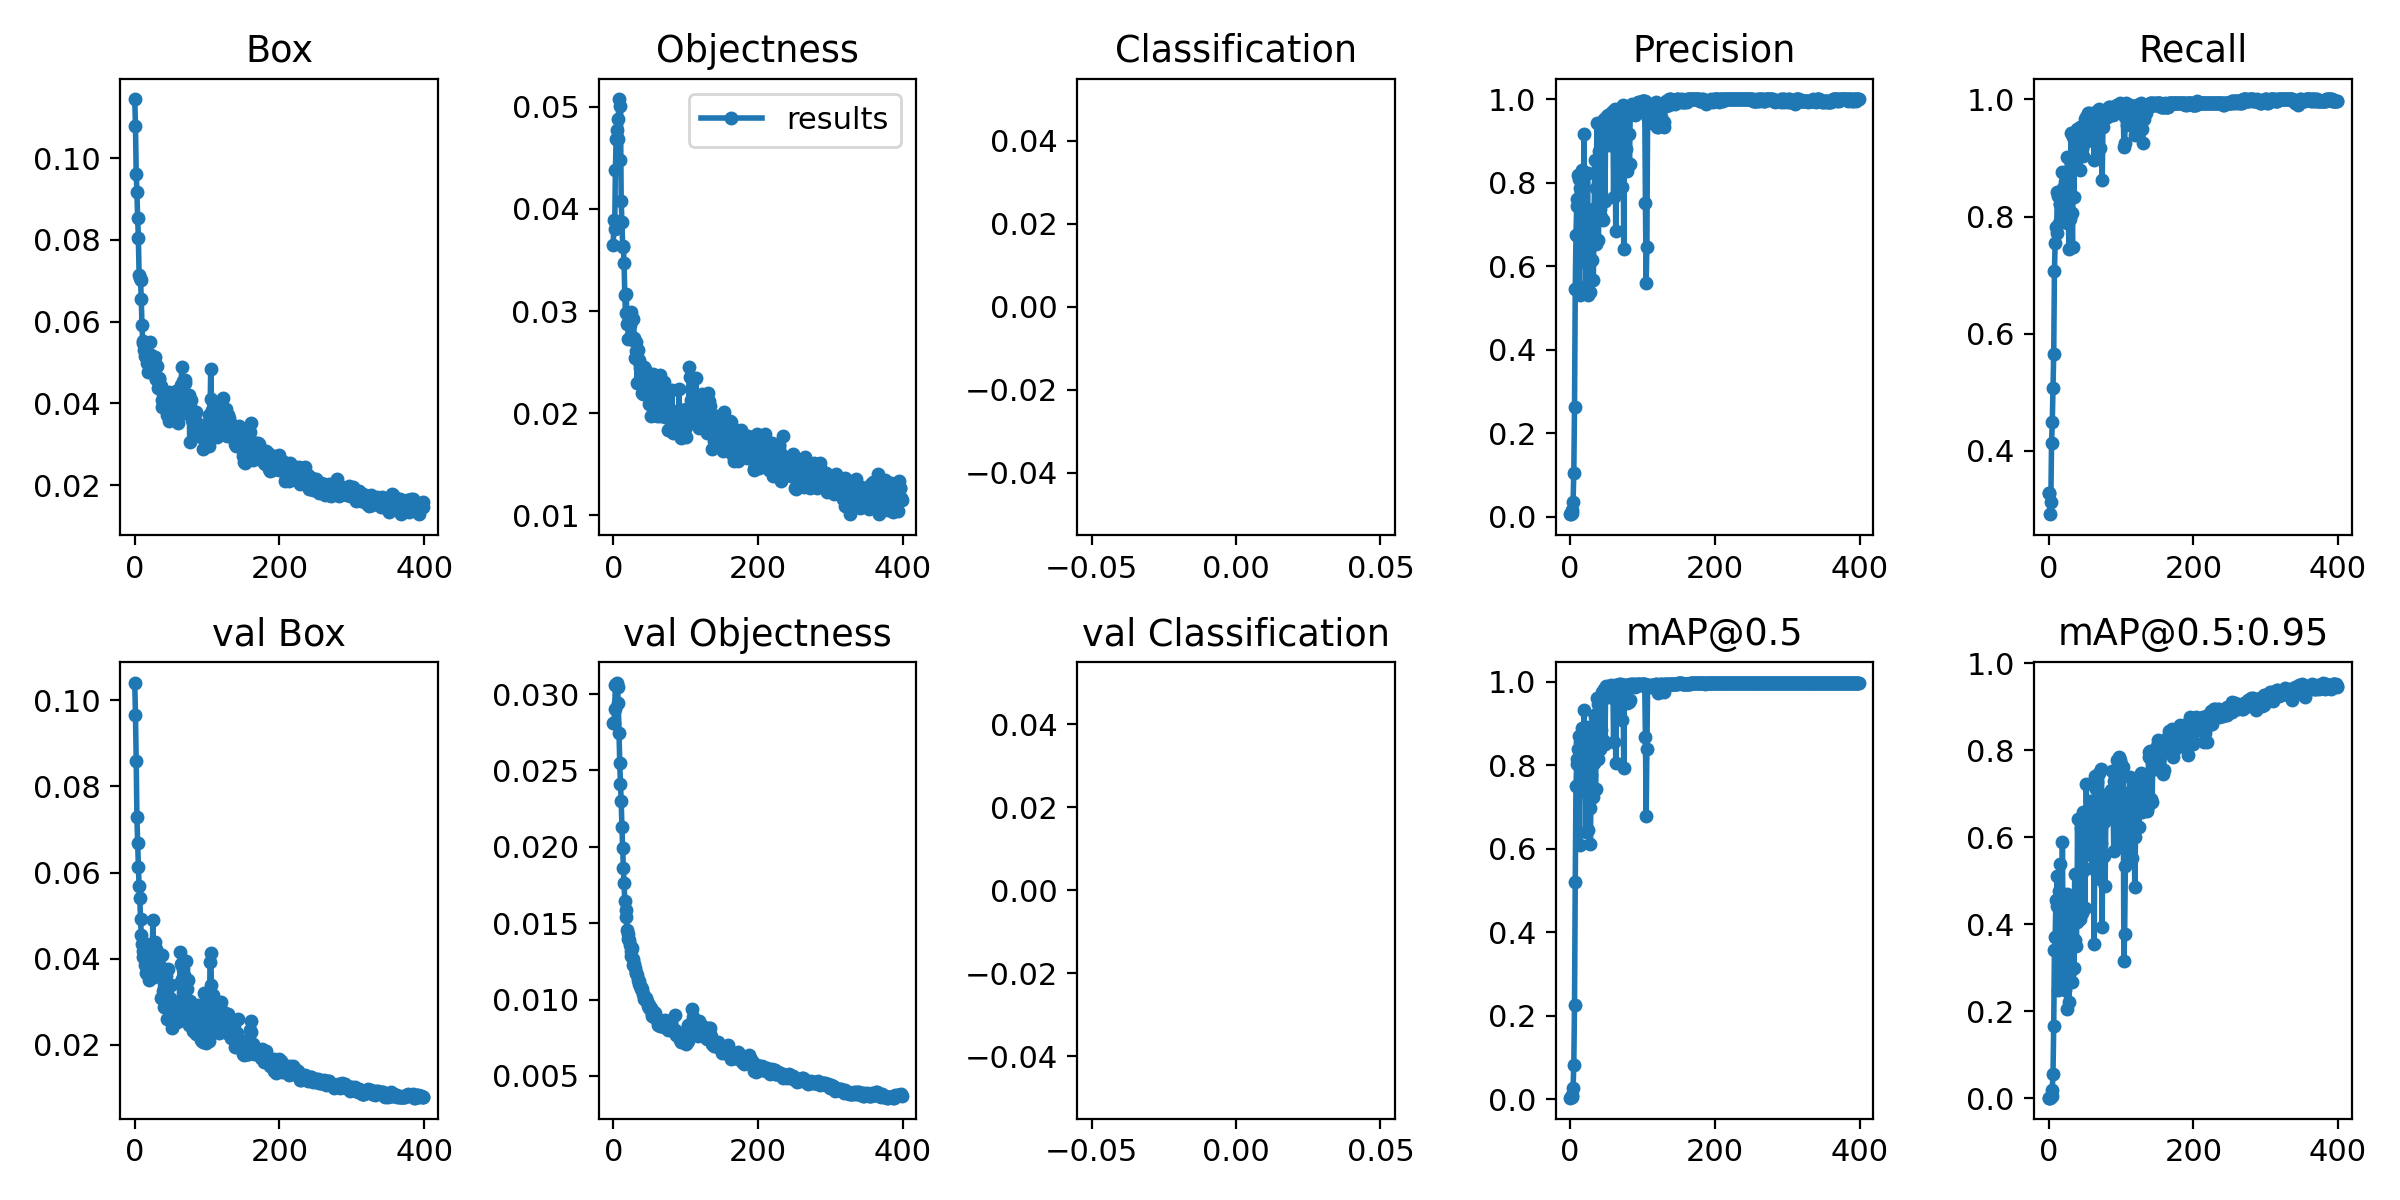

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

In [ ]:
#torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
#!unzip -q tmp.zip -d ../ && rm tmp.zip

In [ ]:
!python train.py --img 640 --batch 64 --epochs 100 --data /content/DataMiningProject/yolo.yaml --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-7-g1487bc8 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='/content/DataMiningProject/yolo.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp7', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=64, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-13 00:26:58.808167: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succes

In [ ]:
!python test.py --weights runs/train/exp5/weights/last.pt --data /content/DataMiningProject/yolo.yaml --img 640 --iou 0.65 --conf 0.001 #mAP
!python test.py --weights runs/train/exp5/weights/last.pt --data /content/DataMiningProject/yolo.yaml --img 640 --iou 0.45 --conf 0.25 #speed
!python test.py --weights runs/train/exp7/weights/last.pt --data /content/DataMiningProject/yolo.yaml --img 640 --iou 0.65 --conf 0.001 #mAP
!python test.py --weights runs/train/exp7/weights/last.pt --data /content/DataMiningProject/yolo.yaml --img 640 --iou 0.45 --conf 0.25 #speed

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/DataMiningProject/yolo.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/exp5/weights/last.pt'])
YOLOv5 🚀 v5.0-7-g1487bc8 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
val: Scanning '/content/DataMiningProject/images/train.cache' images and labels... 118 found, 0 missing, 0 empty, 0 corrupted: 100% 118/118 [00:00<00:00, 1097401.05it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 4/4 [00:03<00:00,  1.18it/s]
                 all         118         298           1       0.993       0.996       0.874
Speed: 4.2/2.2/6.3 ms inference/NMS/total per 640x640 image at batch-size 32
Results saved to

In [ ]:
!python detect.py --weights runs/train/exp7/weights/last.pt --img 640 --conf 0.25 --source /content/pedestrian.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/pedestrian.jpg', update=False, view_img=False, weights=['runs/train/exp/weights/last.pt'])
YOLOv5 🚀 v4.0-185-g74276d5 torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/pedestrian.jpg: 480x640 7 persons, Done. (0.011s)
Results saved to runs/detect/exp3
Done. (0.035s)


In [ ]:
!python detect.py --weights runs/train/exp7/weights/last.pt --img 640 --conf 0.25 --source /content/DataMiningProject/images/test_PNGImages/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/DataMiningProject/images/test_PNGImages/', update=False, view_img=False, weights=['runs/train/exp7/weights/last.pt'])
YOLOv5 🚀 v5.0-7-g1487bc8 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/34 /content/DataMiningProject/images/test_PNGImages/PennPed00063.png: 544x640 1 person, Done. (0.012s)
image 2/34 /content/DataMiningProject/images/test_PNGImages/PennPed00064.png: 576x640 2 persons, Done. (0.012s)
image 3/34 /content/DataMiningProject/images/test_PNGImages/PennPed00065.png: 640x640 1 person, Done. (0.013s)
image 4/34 /content/DataMiningProject/images/test_PNGImages/PennPed00066.png: 576x640 2 persons, Done. (0.012s)
image 5/34 /content/DataMiningProject/im

In [ ]:
Image(filename='../runs/detect/exp/PennPed00063.png')

FileNotFoundError: ignored

In [ ]:
loc = '/content/yolov5/runs/detect/exp2/'
for r, d, f in os.walk(loc):
  for i in f:
    display(Image(loc+i))

Output hidden; open in https://colab.research.google.com to view.